In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from rdkit import Chem
from rdkit.Chem import Descriptors

from rdkit import RDLogger
RDLogger.DisableLog('rdApp.*')

## Load results

In [2]:
file_name_all_eval = "genSMILESeval_proc.xlsx"
file_path_all_eval1 = os.path.join("results_AmEu_proc/results202505261319_GPT4_1_SMILES10x10", file_name_all_eval)
file_path_all_eval2 = os.path.join("results_AmEu_proc/results202505261345_o4mini_SMILES10x10", file_name_all_eval)
file_path_all_eval3 = os.path.join("results_AmEu_proc/results202505261402_GPT4o_SMILES10x10", file_name_all_eval)
file_path_all_eval4 = os.path.join("results_AmEu_proc/results202505261430_GPT4_1_SMILES10x10", file_name_all_eval)
file_path_all_eval5 = os.path.join("results_AmEu_proc/results202505261451_o4mini_SMILES10x10", file_name_all_eval)
file_path_all_eval6 = os.path.join("results_AmEu_proc/results202505261507_GPT4o_SMILES10x10", file_name_all_eval)
file_path_all_eval7 = os.path.join("results_AmEu_proc/results202505271515_GPT4_1_SMILES10x10", file_name_all_eval)
file_path_all_eval8 = os.path.join("results_AmEu_proc/results202505271526_o4mini_SMILES10x10", file_name_all_eval)
file_path_all_eval9 = os.path.join("results_AmEu_proc/results202505271546_GPT4o_SMILES10x10", file_name_all_eval)
file_path_all_eval10 = os.path.join("results_AmEu_proc/results202506242032_GPT4_1_SMILES10x10", file_name_all_eval)
file_path_all_eval11 = os.path.join("results_AmEu_proc/results202506242104_o4mini_SMILES10x10", file_name_all_eval)
file_path_all_eval12 = os.path.join("results_AmEu_proc/results202506242203_GPT4o_SMILES10x10", file_name_all_eval)

df_all_eval1 = pd.read_excel(file_path_all_eval1)
df_all_eval2 = pd.read_excel(file_path_all_eval2)
df_all_eval3 = pd.read_excel(file_path_all_eval3)
df_all_eval4 = pd.read_excel(file_path_all_eval4)
df_all_eval5 = pd.read_excel(file_path_all_eval5)
df_all_eval6 = pd.read_excel(file_path_all_eval6)
df_all_eval7 = pd.read_excel(file_path_all_eval7)
df_all_eval8 = pd.read_excel(file_path_all_eval8)
df_all_eval9 = pd.read_excel(file_path_all_eval9)
df_all_eval10 = pd.read_excel(file_path_all_eval10)
df_all_eval11 = pd.read_excel(file_path_all_eval11)
df_all_eval12 = pd.read_excel(file_path_all_eval12)

df_all_eval6.head(1)

,Gen_SMILES,Target_metal,Other_metal,Source,Similarity_to_Experimental,Similarity_to_Generated,LogP,LogP_value,MaxSim_ToExp_value,MaxSim_ToPrevGen_value,...,Lg_Bottch,BertzCT,Lg_BertzCT,N_count,O_count,N_4to8,Contain_NandO,Contain_bypyridine,Substructures,Donor_type
0,CC1(CCCCC1)C2=NC(C(C)C)=NN2C3=CC=CC=C3,ORGANIC,AQUEOUS,LLM generated,LOW,NaN,ORGANIC,4.6125,0.131313,NaN,...,2.24252,592.180929,2.772454,3,0,False,False,False,s_triazole,N donor


## Complexity

### KDE count by donor

In [3]:
for i in range(1, 13):
    exec(f"list_lg_bottch_{i} = list(df_all_eval{i}[df_all_eval{i}['Lg_Bottch'].notna()]['Lg_Bottch'])")

In [4]:
N_donor_gpt4_1 = list(df_all_eval1[df_all_eval1['Donor_type'] == 'N donor']['Lg_Bottch']) + list(df_all_eval4[df_all_eval4['Donor_type'] == 'N donor']['Lg_Bottch'])  + list(df_all_eval7[df_all_eval7['Donor_type'] == 'N donor']['Lg_Bottch']) + list(df_all_eval10[df_all_eval10['Donor_type'] == 'N donor']['Lg_Bottch'])
O_donor_gpt4_1 = list(df_all_eval1[df_all_eval1['Donor_type'] == 'O donor']['Lg_Bottch']) + list(df_all_eval4[df_all_eval4['Donor_type'] == 'O donor']['Lg_Bottch'])  + list(df_all_eval7[df_all_eval7['Donor_type'] == 'O donor']['Lg_Bottch']) + list(df_all_eval10[df_all_eval10['Donor_type'] == 'O donor']['Lg_Bottch'])
Mix_donor_gpt4_1 = list(df_all_eval1[df_all_eval1['Donor_type'] == 'Mixed N O donor']['Lg_Bottch']) + list(df_all_eval4[df_all_eval4['Donor_type'] == 'Mixed N O donor']['Lg_Bottch'])  + list(df_all_eval7[df_all_eval7['Donor_type'] == 'Mixed N O donor']['Lg_Bottch']) + list(df_all_eval10[df_all_eval10['Donor_type'] == 'Mixed N O donor']['Lg_Bottch'])

N_donor_o4mini = list(df_all_eval2[df_all_eval2['Donor_type'] == 'N donor']['Lg_Bottch']) + list(df_all_eval5[df_all_eval5['Donor_type'] == 'N donor']['Lg_Bottch'])  + list(df_all_eval8[df_all_eval8['Donor_type'] == 'N donor']['Lg_Bottch']) + list(df_all_eval11[df_all_eval11['Donor_type'] == 'N donor']['Lg_Bottch'])
O_donor_o4mini = list(df_all_eval2[df_all_eval2['Donor_type'] == 'O donor']['Lg_Bottch']) + list(df_all_eval5[df_all_eval5['Donor_type'] == 'O donor']['Lg_Bottch'])  + list(df_all_eval8[df_all_eval8['Donor_type'] == 'O donor']['Lg_Bottch']) + list(df_all_eval11[df_all_eval11['Donor_type'] == 'O donor']['Lg_Bottch'])
Mix_donor_o4mini = list(df_all_eval2[df_all_eval2['Donor_type'] == 'Mixed N O donor']['Lg_Bottch']) + list(df_all_eval5[df_all_eval5['Donor_type'] == 'Mixed N O donor']['Lg_Bottch'])  + list(df_all_eval8[df_all_eval8['Donor_type'] == 'Mixed N O donor']['Lg_Bottch']) + list(df_all_eval11[df_all_eval11['Donor_type'] == 'Mixed N O donor']['Lg_Bottch'])

N_donor_gpt4o = list(df_all_eval3[df_all_eval3['Donor_type'] == 'N donor']['Lg_Bottch']) + list(df_all_eval6[df_all_eval6['Donor_type'] == 'N donor']['Lg_Bottch'])  + list(df_all_eval9[df_all_eval9['Donor_type'] == 'N donor']['Lg_Bottch']) + list(df_all_eval12[df_all_eval12['Donor_type'] == 'N donor']['Lg_Bottch'])
O_donor_gpt4o = list(df_all_eval3[df_all_eval3['Donor_type'] == 'O donor']['Lg_Bottch']) + list(df_all_eval6[df_all_eval6['Donor_type'] == 'O donor']['Lg_Bottch'])  + list(df_all_eval9[df_all_eval9['Donor_type'] == 'O donor']['Lg_Bottch']) + list(df_all_eval12[df_all_eval12['Donor_type'] == 'O donor']['Lg_Bottch'])
Mix_donor_gpt4o = list(df_all_eval3[df_all_eval3['Donor_type'] == 'Mixed N O donor']['Lg_Bottch']) + list(df_all_eval6[df_all_eval6['Donor_type'] == 'Mixed N O donor']['Lg_Bottch'])  + list(df_all_eval9[df_all_eval9['Donor_type'] == 'Mixed N O donor']['Lg_Bottch']) + list(df_all_eval12[df_all_eval12['Donor_type'] == 'Mixed N O donor']['Lg_Bottch'])

In [5]:
data_gpt4_1 = {
    "Lg_Bottch": list(N_donor_gpt4_1) + list(O_donor_gpt4_1) + list(Mix_donor_gpt4_1),
    "Donor": (["N Donor"] * len(N_donor_gpt4_1)
              + ["O Donor"] * len(O_donor_gpt4_1)
              + ["Mixed N/O"] * len(Mix_donor_gpt4_1))
}
df_gpt4_1 = pd.DataFrame(data_gpt4_1)

data_o4mini = {
    "Lg_Bottch": list(N_donor_o4mini) + list(O_donor_o4mini) + list(Mix_donor_o4mini),
    "Donor": (["N Donor"] * len(N_donor_o4mini)
              + ["O Donor"] * len(O_donor_o4mini)
              + ["Mixed N/O"] * len(Mix_donor_o4mini))
}
df_o4mini = pd.DataFrame(data_o4mini)

data_gpt4o = {
    "Lg_Bottch": list(N_donor_gpt4o) + list(O_donor_gpt4o) + list(Mix_donor_gpt4o),
    "Donor": (["N Donor"] * len(N_donor_gpt4o)
              + ["O Donor"] * len(O_donor_gpt4o)
              + ["Mixed N/O"] * len(Mix_donor_gpt4o))
}
df_gpt4o = pd.DataFrame(data_gpt4o)

In [6]:
from utils import plot_kde_count

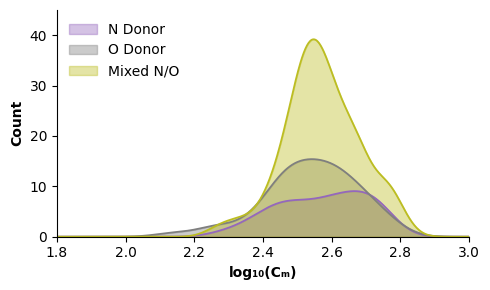

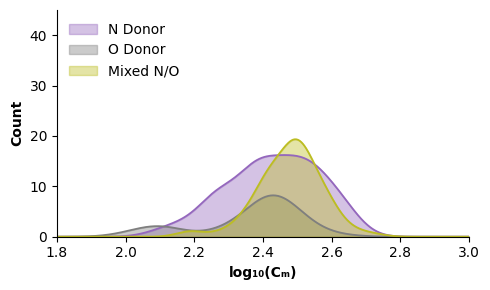

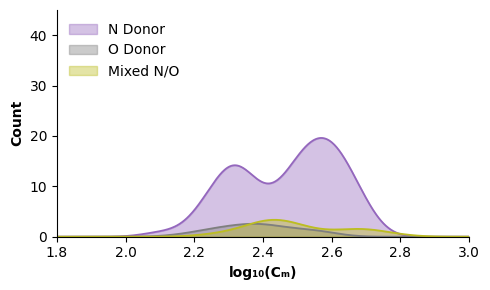

In [7]:
plot_kde_count(df_gpt4_1)
plot_kde_count(df_o4mini)
plot_kde_count(df_gpt4o)

### More complexity

In [8]:
from bottchscore.bottchscore3 import calculate_bottchscore_from_smiles
smiles_btbp = 'CC(C)(C)c1cc(-c2cc(C(C)(C)C)cc(-c3nnc4c(n3)C(C)(C)CCC4(C)C)n2)nc(-c2nnc3c(n2)C(C)(C)CCC3(C)C)c1'
cm = calculate_bottchscore_from_smiles(smiles_btbp, verbose_response=False, debug_arg=False, disable_mesomer=False, automorp_memory_maxsize=3000000)
print(cm)
log_complex_score_BTBP = np.log10(cm)
print(log_complex_score_BTBP)

266.85009953262056
2.426267369127464


In [9]:
print(df_all_eval1.shape)
df_all_eval1.head(3)

(100, 21)


,Gen_SMILES,Target_metal,Other_metal,Source,Similarity_to_Experimental,Similarity_to_Generated,LogP,LogP_value,MaxSim_ToExp_value,MaxSim_ToPrevGen_value,...,Lg_Bottch,BertzCT,Lg_BertzCT,N_count,O_count,N_4to8,Contain_NandO,Contain_bypyridine,Substructures,Donor_type
0,CC(C)CCN(CC(C)C)C(=O)c1nc(NCCNC(=O)N(CC(C)C)CC...,ORGANIC,AQUEOUS,LLM generated,LOW,NaN,ORGANIC,5.2352,0.169231,NaN,...,2.587429,858.197989,2.933587,6,2,True,True,False,"pyrimidine, amide, carbamide",Mixed N O donor
1,CCCCCCCCN(CCNC(=O)N(CCCCCCCC)CCCCCCCC)C(=O)NCC...,ORGANIC,AQUEOUS,LLM generated,MEDIUM,NaN,ORGANIC,12.8237,0.358209,NaN,...,2.625384,842.857912,2.925754,6,3,True,True,False,carbamide,O donor
2,CC(C)CCCn1cc(NC(=O)N(CC(C)C)CC(C)C)nc1NC(=O)N(...,ORGANIC,AQUEOUS,LLM generated,LOW,NaN,ORGANIC,6.6111,0.175926,NaN,...,2.512002,749.721070,2.874900,6,2,True,True,False,"imidazole, n_heterocycle, carbamide",Mixed N O donor


In [10]:
df_all_eval1[(df_all_eval1['Donor_type'] == 'Mixed N O donor') & 
             (df_all_eval1['Lg_Bottch'] > 2.2) &
             (df_all_eval1['Lg_Bottch'] < 2.4)]

,Gen_SMILES,Target_metal,Other_metal,Source,Similarity_to_Experimental,Similarity_to_Generated,LogP,LogP_value,MaxSim_ToExp_value,MaxSim_ToPrevGen_value,...,Lg_Bottch,BertzCT,Lg_BertzCT,N_count,O_count,N_4to8,Contain_NandO,Contain_bypyridine,Substructures,Donor_type
12,CCCCCCCCN(CCCCCCCC)C(=O)Nc1ncnc(NC(=O)N(CCCCCC...,ORGANIC,AQUEOUS,LLM generated,MEDIUM,MEDIUM,ORGANIC,10.98140,0.402985,0.341772,...,2.355445,772.627586,2.887970,7,2,True,True,False,"s_triazine, n_ring, carbamide",Mixed N O donor
35,CC(C)N(CC(C)C)C(=O)N1CCNC(=N)NCC1,ORGANIC,AQUEOUS,LLM generated,LOW,LOW,AQUEOUS,0.90237,0.166667,0.209877,...,2.254500,304.155437,2.483096,5,1,True,True,False,"n_heterocycle, carbamide",Mixed N O donor


## Total good count

In [11]:
def count_good(df):
    count = ((df['Target_metal'] == 'ORGANIC') &
             (df['Other_metal'] == 'AQUEOUS') &
             ((df['Similarity_to_Experimental'] == 'MEDIUM') | (df['Similarity_to_Experimental'] == 'LOW')) &
             (df['Similarity_to_Generated'] != 'HIGH') &
             (df['LogP'] == 'ORGANIC')).sum()
    return count

list_good_count = []
for i in range(1, 13):
    exec(f'good_count{i} = count_good(df_all_eval{i})')
    exec(f'list_good_count.append(good_count{i})')

df_good_count = pd.DataFrame(
    data = np.array(list_good_count).reshape(4, 3),
    index = ['Design 1', 'Design 2', 'Design 3', 'Design 4'],
    columns = ['GPT4.1', 'O4-mini', 'GPT4o']
)
df_good_count

,GPT4.1,O4-mini,GPT4o
Design 1,64,48,42
Design 2,41,41,40
Design 3,74,47,47
Design 4,84,43,29


## Invalid SMILES count

In [12]:
def count_invalid(df):
    count = (df["Similarity_to_Experimental"] == "Invalid SMILES").sum()
    return count

list_invalid_count = []
for i in range(1, 13):
    exec(f'invalid_count{i} = count_invalid(df_all_eval{i})')
    exec(f'list_invalid_count.append(invalid_count{i})')

df_invalid_count = pd.DataFrame(
    data = np.array(list_invalid_count).reshape(4, 3),
    index = ['Design 1', 'Design 2', 'Design 3', 'Design 4'],
    columns = ['GPT4.1', 'O4-mini', 'GPT4o']
)
df_invalid_count

,GPT4.1,O4-mini,GPT4o
Design 1,7,32,50
Design 2,0,24,41
Design 3,7,29,47
Design 4,7,54,70


## Compare follow instructions

### Count donor

In [13]:
def count_N_donor(df):
    count = (df['Donor_type'] == 'N donor').sum()
    return count

list_N_donor = []
for i in range(1, 13):
    exec(f'N_donor_count{i} = count_N_donor(df_all_eval{i})')
    exec(f'list_N_donor.append(N_donor_count{i})')

df_N_donor_count = pd.DataFrame(
    data = np.array(list_N_donor).reshape(4, 3),
    index = ['Design 1', 'Design 2', 'Design 3', 'Design 4'],
    columns = ['GPT4.1', 'O4-mini', 'GPT4o']
)
df_N_donor_count

,GPT4.1,O4-mini,GPT4o
Design 1,0,61,40
Design 2,1,4,39
Design 3,7,23,40
Design 4,61,39,29


In [14]:
def count_O_donor(df):
    count = (df['Donor_type'] == 'O donor').sum()
    return count

list_O_donor = []
for i in range(1, 13):
    exec(f'O_donor_count{i} = count_O_donor(df_all_eval{i})')
    exec(f'list_O_donor.append(O_donor_count{i})')

df_O_donor_count = pd.DataFrame(
    data = np.array(list_O_donor).reshape(4, 3),
    index = ['Design 1', 'Design 2', 'Design 3', 'Design 4'],
    columns = ['GPT4.1', 'O4-mini', 'GPT4o']
)
df_O_donor_count

,GPT4.1,O4-mini,GPT4o
Design 1,38,0,8
Design 2,58,29,6
Design 3,12,16,3
Design 4,0,0,0


In [15]:
def count_mix_donor(df):
    count = (df['Donor_type'] == 'Mixed N O donor').sum()
    return count

list_mix_donor = []
for i in range(1, 13):
    exec(f'mix_donor_count{i} = count_mix_donor(df_all_eval{i})')
    exec(f'list_mix_donor.append(mix_donor_count{i})')

df_mix_donor_count = pd.DataFrame(
    data = np.array(list_mix_donor).reshape(4, 3),
    index = ['Design 1', 'Design 2', 'Design 3', 'Design 4'],
    columns = ['GPT4.1', 'O4-mini', 'GPT4o']
)
df_mix_donor_count

,GPT4.1,O4-mini,GPT4o
Design 1,55,6,1
Design 2,41,43,12
Design 3,74,30,9
Design 4,32,7,0


### Count good following instructions

In [16]:
def count_good_ins(df):
    count = ((df['Target_metal'] == 'ORGANIC') &
             (df['Other_metal'] == 'AQUEOUS') &
             (df['Similarity_to_Experimental'] == 'MEDIUM') & 
             (df['Similarity_to_Generated'] != 'HIGH') &
             (df['LogP'] == 'ORGANIC')).sum()
    return count

list_good_count_ins = []
for i in range(1, 13):
    exec(f'final_count{i} = count_good_ins(df_all_eval{i})')
    exec(f'list_good_count_ins.append(final_count{i})')

df_good_ins_count = pd.DataFrame(
    data = np.array(list_good_count_ins).reshape(4, 3),
    index = ['Design 1', 'Design 2', 'Design 3', 'Design 4'],
    columns = ['GPT4.1', 'O4-mini', 'GPT4o']
)
df_good_ins_count

,GPT4.1,O4-mini,GPT4o
Design 1,36,10,15
Design 2,27,22,9
Design 3,19,14,20
Design 4,50,0,14


### N4to8 design

In [17]:
def count_N4to8(df):
    count = len(df[df['N_4to8']==True])
    return count

list_followNdesign = []
for i in range(1, 13):
    exec(f'num_followNdesign_{i} = count_N4to8(df_all_eval{i})')
    exec(f'list_followNdesign.append(num_followNdesign_{i})')

df_followNdesign_count = pd.DataFrame(
    data = np.array(list_followNdesign).reshape(4, 3),
    index = ['Design 1', 'Design 2', 'Design 3', 'Design 4'],
    columns = ['GPT4.1', 'O4-mini', 'GPT4o']
)
df_followNdesign_count

,GPT4.1,O4-mini,GPT4o
Design 1,77,48,28
Design 2,52,9,34
Design 3,73,16,38
Design 4,63,43,27


### N and O design

In [18]:
def count_NandO(df):
    count = len(df[df['Contain_NandO']==True])
    return count

list_followNandOdesign = []
for i in range(1, 13):
    exec(f'num_followNandOdesign_{i} = count_NandO(df_all_eval{i})')
    exec(f'list_followNandOdesign.append(num_followNandOdesign_{i})')

df_followNandOdesign_count = pd.DataFrame(
    data = np.array(list_followNandOdesign).reshape(4, 3),
    index = ['Design 1', 'Design 2', 'Design 3', 'Design 4'],
    columns = ['GPT4.1', 'O4-mini', 'GPT4o']
)
df_followNandOdesign_count

,GPT4.1,O4-mini,GPT4o
Design 1,93,6,8
Design 2,99,73,20
Design 3,91,62,12
Design 4,44,9,0


### Log P count

In [19]:
def count_logP(df):
    count = len(df[df['LogP']=='ORGANIC'])
    return count

list_logP_org = []
for i in range(1, 13):
    exec(f'num_logP_org_{i} = count_logP(df_all_eval{i})')
    exec(f'list_logP_org.append(num_logP_org_{i})')

df_logP_count = pd.DataFrame(
    data = np.array(list_logP_org).reshape(4, 3),
    index = ['Design 1', 'Design 2', 'Design 3', 'Design 4'],
    columns = ['GPT4.1', 'O4-mini', 'GPT4o']
)
df_logP_count

,GPT4.1,O4-mini,GPT4o
Design 1,76,61,49
Design 2,91,61,52
Design 3,84,71,52
Design 4,88,43,30


In [20]:
def count_bypyridine(df):
    count = len(df[df['Contain_bypyridine']==True])
    return count

list_count_bypyridine = []
for i in range(1, 13):
    exec(f'num_bypyridine_{i} = count_bypyridine(df_all_eval{i})')
    exec(f'list_count_bypyridine.append(num_bypyridine_{i})')

df_bypyridine_count = pd.DataFrame(
    data = np.array(list_count_bypyridine).reshape(4, 3),
    index = ['Design 1', 'Design 2', 'Design 3', 'Design 4'],
    columns = ['GPT4.1', 'O4-mini', 'GPT4o']
)
df_bypyridine_count

,GPT4.1,O4-mini,GPT4o
Design 1,0,0,6
Design 2,0,1,4
Design 3,1,0,7
Design 4,28,0,7


### Plot hist follow instruction

In [25]:
data_valid_gpt4_1 = np.array([
    100 - df_invalid_count['GPT4.1']["Design 1"],
    100 - df_invalid_count['GPT4.1']["Design 2"],
    100 - df_invalid_count['GPT4.1']["Design 3"],
    100 - df_invalid_count['GPT4.1']["Design 4"],
])
data_follow_gpt4_1 = np.array([
    df_followNdesign_count['GPT4.1']["Design 1"],
    df_mix_donor_count['GPT4.1']["Design 2"],
    df_mix_donor_count['GPT4.1']["Design 3"],
    df_bypyridine_count['GPT4.1']["Design 4"],
])

data_valid_o4mini = np.array([
    100 - df_invalid_count['O4-mini']["Design 1"],
    100 - df_invalid_count['O4-mini']["Design 2"],
    100 - df_invalid_count['O4-mini']["Design 3"],
    100 - df_invalid_count['O4-mini']["Design 4"],
])
data_follow_o4mini = np.array([
    df_followNdesign_count['O4-mini']["Design 1"],
    df_mix_donor_count['O4-mini']["Design 2"],
    df_mix_donor_count['O4-mini']["Design 3"],
    df_bypyridine_count['O4-mini']["Design 4"],
])

data_valid_4o = np.array([
    100 - df_invalid_count['GPT4o']["Design 1"],
    100 - df_invalid_count['GPT4o']["Design 2"],
    100 - df_invalid_count['GPT4o']["Design 3"],
    100 - df_invalid_count['GPT4o']["Design 4"],
])
data_follow_4o = np.array([
    df_followNdesign_count['GPT4o']["Design 1"],
    df_mix_donor_count['GPT4o']["Design 2"],
    df_mix_donor_count['GPT4o']["Design 3"],
    df_bypyridine_count['GPT4o']["Design 4"],
])

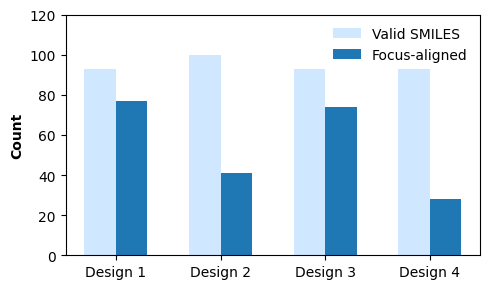

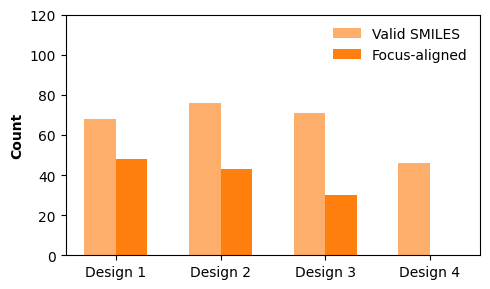

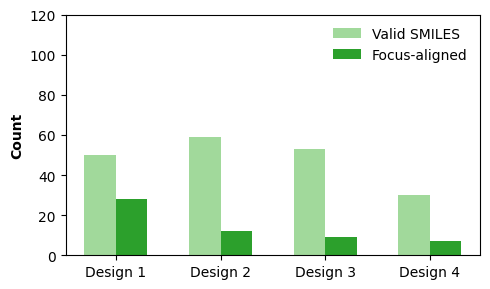

In [27]:
from utils import plot_bar2_design

plot_bar2_design(data_valid_gpt4_1, data_follow_gpt4_1, "#cfe8ff", "#1f77b4")
plot_bar2_design(data_valid_o4mini, data_follow_o4mini, "#fdae6b", "#ff7f0e")
plot_bar2_design(data_valid_4o, data_follow_4o, "#a1d99b", "#2ca02c")

## Compare SA

In [28]:
# Load the Excel file
results_folder_name = "../s2_runfSepaMolGen/results_AmEu/results202505261319_GPT4_1_SMILES10x10"
results_folder_name_2 = "../s2_runfSepaMolGen/results_AmEu/results202506041042_GPT4_1_SMILES10x10"

# Get results file name
file_name_gen_SMILES_eval = "genSMILESeval.xlsx"

file_path_gen_SMILES_eval = os.path.join(results_folder_name, file_name_gen_SMILES_eval)
file_path_gen_SMILES_eval_2 = os.path.join(results_folder_name_2, file_name_gen_SMILES_eval)

df_gen_SMILES_eval = pd.read_excel(file_path_gen_SMILES_eval)
df_gen_SMILES_eval_2 = pd.read_excel(file_path_gen_SMILES_eval_2)

print(df_gen_SMILES_eval.shape)
df_gen_SMILES_eval.head(2)

(100, 7)


,Gen_SMILES,Target_metal,Other_metal,Source,Similarity_to_Experimental,Similarity_to_Generated,LogP
0,CC(C)CCN(CC(C)C)C(=O)c1nc(NCCNC(=O)N(CC(C)C)CC...,ORGANIC,AQUEOUS,LLM generated,LOW,NaN,ORGANIC
1,CCCCCCCCN(CCNC(=O)N(CCCCCCCC)CCCCCCCC)C(=O)NCC...,ORGANIC,AQUEOUS,LLM generated,MEDIUM,NaN,ORGANIC


In [29]:
from SA_Score import sascorer

def cal_SA(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        SA_score = sascorer.calculateScore(mol)
    else:
        SA_score = "Invalid SMILES"
    return SA_score

df_gen_SMILES_eval['SA_score'] = df_gen_SMILES_eval['Gen_SMILES'].apply(cal_SA)
ser_valid_score = df_gen_SMILES_eval[df_gen_SMILES_eval['SA_score'] != 'Invalid SMILES']['SA_score']
print(ser_valid_score.shape)
print("mean: ", ser_valid_score.mean())
df_gen_SMILES_eval.head(2)

(93,)
mean:  2.92728878641847


,Gen_SMILES,Target_metal,Other_metal,Source,Similarity_to_Experimental,Similarity_to_Generated,LogP,SA_score
0,CC(C)CCN(CC(C)C)C(=O)c1nc(NCCNC(=O)N(CC(C)C)CC...,ORGANIC,AQUEOUS,LLM generated,LOW,NaN,ORGANIC,3.018943
1,CCCCCCCCN(CCNC(=O)N(CCCCCCCC)CCCCCCCC)C(=O)NCC...,ORGANIC,AQUEOUS,LLM generated,MEDIUM,NaN,ORGANIC,2.684985


In [30]:
df_gen_SMILES_eval_2['SA_score'] = df_gen_SMILES_eval_2['Gen_SMILES'].apply(cal_SA)
ser_valid_score_2 = df_gen_SMILES_eval_2[df_gen_SMILES_eval_2['SA_score'] != 'Invalid SMILES']['SA_score']
print(ser_valid_score_2.shape)
print("mean: ", ser_valid_score_2.mean())
df_gen_SMILES_eval_2.head(3)

(70,)
mean:  2.980487750625101


,Gen_SMILES,Target_metal,Other_metal,Source,Similarity_to_Experimental,Similarity_to_Generated,LogP,SA_score
0,CC1=C(N2C=CN=C2C=C1)C(CCCCCC)NC(=O)CCN(C(=O)CC...,ORGANIC,AQUEOUS,LLM generated,LOW,NaN,ORGANIC,3.503031
1,CCN(CCCN1C=NC=N1CCCCNC(=O)CCCC)C(=O)CN2C=NC=N2...,Invalid SMILES,Invalid SMILES,LLM generated,Invalid SMILES,Invalid SMILES,Invalid SMILES,Invalid SMILES
2,CCCCCCCCN(CC(=O)N(CCCCCCCC)CCCN3C=NC=N3)CC(=O)...,ORGANIC,AQUEOUS,LLM generated,MEDIUM,NaN,ORGANIC,3.076601


## GPT5

In [31]:
file_path_all_eval13 = os.path.join("results_AmEu_proc/results202508101049_GPT5_SMILES10x10", file_name_all_eval)
file_path_all_eval14 = os.path.join("results_AmEu_proc/results202508101150_GPT5_SMILES10x10", file_name_all_eval)
file_path_all_eval15 = os.path.join("results_AmEu_proc/results202508101339_GPT5_SMILES10x10", file_name_all_eval)
file_path_all_eval16 = os.path.join("results_AmEu_proc/results202508101432_GPT5_SMILES10x10", file_name_all_eval)

df_all_eval13 = pd.read_excel(file_path_all_eval13)
df_all_eval14 = pd.read_excel(file_path_all_eval14)
df_all_eval15 = pd.read_excel(file_path_all_eval15)
df_all_eval16 = pd.read_excel(file_path_all_eval16)

### KDE count by donor

In [32]:
N_donor_gpt5 = list(df_all_eval13[df_all_eval13['Donor_type'] == 'N donor']['Lg_Bottch']) + list(df_all_eval14[df_all_eval14['Donor_type'] == 'N donor']['Lg_Bottch'])  + list(df_all_eval15[df_all_eval15['Donor_type'] == 'N donor']['Lg_Bottch']) + list(df_all_eval16[df_all_eval16['Donor_type'] == 'N donor']['Lg_Bottch'])
O_donor_gpt5 = list(df_all_eval13[df_all_eval13['Donor_type'] == 'O donor']['Lg_Bottch']) + list(df_all_eval14[df_all_eval14['Donor_type'] == 'O donor']['Lg_Bottch'])  + list(df_all_eval15[df_all_eval15['Donor_type'] == 'O donor']['Lg_Bottch']) + list(df_all_eval16[df_all_eval16['Donor_type'] == 'O donor']['Lg_Bottch'])
Mix_donor_gpt5 = list(df_all_eval13[df_all_eval13['Donor_type'] == 'Mixed N O donor']['Lg_Bottch']) + list(df_all_eval14[df_all_eval14['Donor_type'] == 'Mixed N O donor']['Lg_Bottch'])  + list(df_all_eval15[df_all_eval15['Donor_type'] == 'Mixed N O donor']['Lg_Bottch']) + list(df_all_eval16[df_all_eval16['Donor_type'] == 'Mixed N O donor']['Lg_Bottch'])

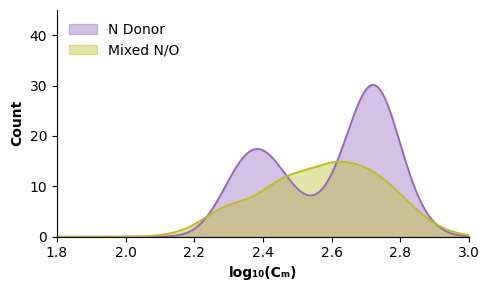

In [33]:
data_gpt5 = {
    "Lg_Bottch": list(N_donor_gpt5) + list(O_donor_gpt5) + list(Mix_donor_gpt5),
    "Donor": (["N Donor"] * len(N_donor_gpt5)
              + ["O Donor"] * len(O_donor_gpt5)
              + ["Mixed N/O"] * len(Mix_donor_gpt5))
}
df_gpt5 = pd.DataFrame(data_gpt5)

plot_kde_count(df_gpt5)

### Total good count

In [ ]:
good_count_gpt5_design1 = count_good(df_all_eval13)
good_count_gpt5_design2 = count_good(df_all_eval14)
good_count_gpt5_design3 = count_good(df_all_eval15)
good_count_gpt5_design4 = count_good(df_all_eval16)
list_good_count_gpt5 = [good_count_gpt5_design1, good_count_gpt5_design2, good_count_gpt5_design3, good_count_gpt5_design4]

df_good_count_gpt5 = pd.DataFrame(list_good_count_gpt5, columns=['GPT5'], index=['Design 1','Design 2','Design 3','Design 4'])
df_good_count = pd.concat([df_good_count, df_good_count_gpt5], axis=1)

df_good_count

,GPT4.1,O4-mini,GPT4o,GPT5
Design 1,64,48,42,78
Design 2,41,41,40,60
Design 3,74,47,47,69
Design 4,84,43,29,90


### Invalid count

In [ ]:
invalid_count_gpt5_design1 = count_invalid(df_all_eval13)
invalid_count_gpt5_design2 = count_invalid(df_all_eval14)
invalid_count_gpt5_design3 = count_invalid(df_all_eval15)
invalid_count_gpt5_design4 = count_invalid(df_all_eval16)
list_invalid_count_gpt5 = [invalid_count_gpt5_design1, invalid_count_gpt5_design2, invalid_count_gpt5_design3, invalid_count_gpt5_design4]

df_invalid_count_gpt5 = pd.DataFrame(list_invalid_count_gpt5, columns=['GPT5'], index=['Design 1','Design 2','Design 3','Design 4'])
df_invalid_count = pd.concat([df_invalid_count, df_invalid_count_gpt5], axis=1)

df_invalid_count

,GPT4.1,O4-mini,GPT4o,GPT5
Design 1,7,32,50,15
Design 2,0,24,41,13
Design 3,7,29,47,17
Design 4,7,54,70,8
